# # START

In [1]:
import os

# Loading & Examining the DataSet

In [98]:
print(len(os.listdir('Traffic/traffic/')))
print(len(os.listdir('Traffic/traffic/Train/')))
print(len(os.listdir('Traffic/traffic/Test/')))


'''
# Info about the training set

for i in range(0, 43):
    a = str(i)
    path = 'Traffic/traffic/Train/' + str(i) + "/"
    print("class " , i , " is " , len(os.listdir(path)))
'''


for i in range(0, 43):
    a = str(i)
    path = 'Traffic/traffic/Test/' + str(i) + "/"
    print("class " , i , " is " , len(os.listdir(path)))


3
44
44
class  0  is  61
class  1  is  720
class  2  is  750
class  3  is  450
class  4  is  660
class  5  is  630
class  6  is  150
class  7  is  450
class  8  is  450
class  9  is  480
class  10  is  661
class  11  is  420
class  12  is  690
class  13  is  720
class  14  is  270
class  15  is  210
class  16  is  150
class  17  is  360
class  18  is  390
class  19  is  60
class  20  is  90
class  21  is  90
class  22  is  120
class  23  is  150
class  24  is  90
class  25  is  480
class  26  is  180
class  27  is  60
class  28  is  150
class  29  is  90
class  30  is  150
class  31  is  270
class  32  is  60
class  33  is  210
class  34  is  120
class  35  is  390
class  36  is  120
class  37  is  60
class  38  is  690
class  39  is  90
class  40  is  90
class  41  is  60
class  42  is  90


In [101]:
print(os.listdir('Traffic/traffic/'))

print("Train")
print(os.listdir('Traffic/traffic/Train/'))

print("Test")
print(os.listdir('Traffic/traffic/Test/'))



['.DS_Store', 'Test', 'Train']
Train
['32', '35', '34', '33', '.DS_Store', '20', '18', '27', '9', '0', '11', '7', '29', '16', '42', '6', '28', '17', '1', '10', '19', '26', '8', '21', '38', '36', '31', '30', '37', '39', '41', '24', '23', '4', '15', '3', '12', '40', '2', '13', '5', '14', '22', '25']
Test
['32', '35', '34', '33', '.DS_Store', '20', '18', '27', '9', '0', '11', '7', '29', '16', '42', '6', '28', '17', '1', '10', '19', '26', '8', '21', '38', '36', '31', '30', '37', '39', '41', '24', '23', '4', '15', '3', '12', '40', '2', '13', '5', '14', '22', '25']


In [3]:
base_dir = 'Traffic/traffic'

train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Test')





.......

.....

.........

#                                      # MODEL ARCHITECTURES

In [4]:
import tensorflow as tf

# modelV1

Model Arcitecture   ::::: model == modelV1

In [49]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    
    tf.keras.layers.Dense(43, activation='softmax')  
])

Model Summary

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [46]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

.....

# modelV2 

Model Architecture


V2 experiments with the dropout layer (changing the dropout rates)

The dropout layer is placed before the last layer (softmax layer)

In [123]:
modelV2 = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    
    tf.keras.layers.Dropout(0.5),   # 0.55 dropout rate has been most successful till now
    
    tf.keras.layers.Dense(43, activation='softmax')  
])

Model Summary

In [124]:
modelV2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [125]:
modelV2.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

.....

.......

.....

# Callback function

In [127]:

class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get("accuracy") > 0.998):
            print("\n Reached Desired Accuracy, so terminating training !! ")
            self.model.stop_training = True
            
            
callbacks= myCallBack()


......

......

# Data Preprocessing

In [128]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255)
test_datagen  = ImageDataGenerator( rescale = 1.0/255)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    #batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         #batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

'''
Output : 
Found 39209 images belonging to 43 classes.
Found 12630 images belonging to 43 classes.
'''

Found 39209 images belonging to 43 classes.
Found 12630 images belonging to 43 classes.


'\nOutput : \nFound 39209 images belonging to 43 classes.\nFound 12630 images belonging to 43 classes.\n'

......

......

# FITTING & EVALUATING MODELS

# modelV1 

In [48]:
history = model.fit (
                         train_generator,
                         validation_data = validation_generator,
                         epochs = 5,
                         verbose = 1
)

'''
history = model.fit (
                         train_generator,
                         validation_data = validation_generator,
                         epochs = 5,
                         callbacks = [callbacks],
                         verbose = 1
)

'''

Epoch 1/5
1226/1226 [==============================] - 594s 485ms/step - loss: 0.5396 - accuracy: 0.8486 - val_loss: 0.3475 - val_accuracy: 0.9138
Epoch 2/5
1226/1226 [==============================] - 589s 480ms/step - loss: 0.0797 - accuracy: 0.9782 - val_loss: 0.3118 - val_accuracy: 0.9279
Epoch 3/5
1226/1226 [==============================] - 599s 489ms/step - loss: 0.0422 - accuracy: 0.9878 - val_loss: 0.4086 - val_accuracy: 0.9268
Epoch 4/5
1226/1226 [==============================] - 610s 498ms/step - loss: 0.0329 - accuracy: 0.9906 - val_loss: 0.4541 - val_accuracy: 0.9217
Epoch 5/5
1226/1226 [==============================] - 673s 549ms/step - loss: 0.0198 - accuracy: 0.9939 - val_loss: 0.3837 - val_accuracy: 0.9285


.....

# modelV2

In [46]:
# initiallly modelV2 had dropout rate 0.2
# dropout rate of 0.4 performed better than 0.2 (taken 6 epochs)
# dropout rate of 0.55 was best for 6 epochs, so going for more epochs




# trying 20 epochs for 0.5 dropout
historyV2 = modelV2.fit (
                         train_generator,
                         validation_data = validation_generator,
                         epochs = 20,
                         callbacks = [callbacks],
                         verbose = 1
)

Epoch 1/6
1226/1226 [==============================] - 570s 465ms/step - loss: 0.1150 - accuracy: 0.9669 - val_loss: 0.2120 - val_accuracy: 0.9431
Epoch 2/6
1226/1226 [==============================] - 565s 461ms/step - loss: 0.0830 - accuracy: 0.9762 - val_loss: 0.2507 - val_accuracy: 0.9384
Epoch 3/6
1226/1226 [==============================] - 566s 461ms/step - loss: 0.0640 - accuracy: 0.9810 - val_loss: 0.1854 - val_accuracy: 0.9534
Epoch 4/6
1226/1226 [==============================] - 580s 473ms/step - loss: 0.0581 - accuracy: 0.9827 - val_loss: 0.2441 - val_accuracy: 0.9433
Epoch 5/6
1226/1226 [==============================] - 689s 562ms/step - loss: 0.0499 - accuracy: 0.9848 - val_loss: 0.2020 - val_accuracy: 0.9487
Epoch 6/6
1226/1226 [==============================] - 571s 466ms/step - loss: 0.0384 - accuracy: 0.9882 - val_loss: 0.2292 - val_accuracy: 0.9494


....

....

......

# PLOTTING THE RESULTS

Red represents Training set



Blue represents Validation set 

In [11]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

# modelV1

Text(0.5, 1.0, 'Training and validation loss')

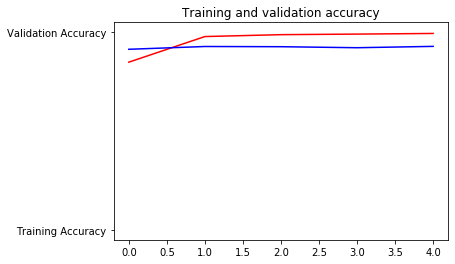

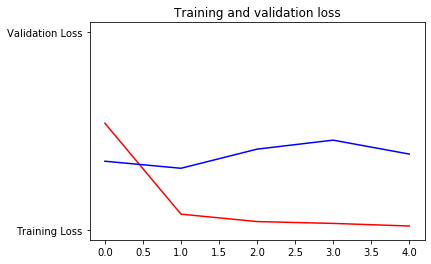

In [57]:
# PLOT LOSS AND ACCURACY
%matplotlib inline


#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

......

# modelV2

Text(0.5, 1.0, 'Training and validation loss')

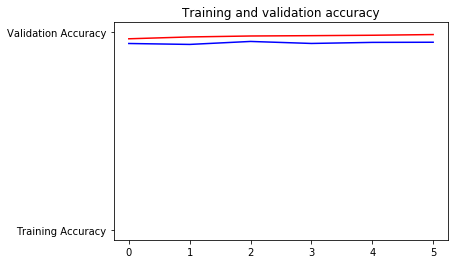

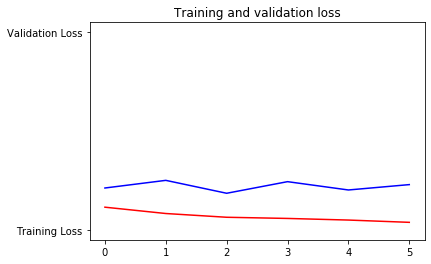

In [89]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=historyV2.history['accuracy']
val_acc=historyV2.history['val_accuracy']
loss=historyV2.history['loss']
val_loss=historyV2.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

......

......

.....

# SAVING & LOADING MODEL

In [22]:
#from tensorflow import keras

# modelV2

Saving the model to the specified path

In [2]:
#modelV2.save("modelV2")

Code for reloading the model

In [3]:
#modelV2 = keras.models.load_model("modelV2")

.....

......

.......

# TESTING for Individual Images

In [70]:
#from tensorflow import keras
#from IPython.display import Image
from tensorflow.keras.preprocessing import image
import numpy as np

In [122]:
image_path = '03967.png'  # insert the path of the image to be tested

# option 1


# dimensions of our images
img_width, img_height = 150, 150     # set as per earlier convention


modelV2.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# predicting images
img = image.load_img(image_path, target_size = (img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = modelV2.predict_classes(images)
print(classes[0])

pred = modelV2.predict(images)
print(pred)
#print()

23
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


......

.......